# 2020 Covid dataset analysed


## Part 1 - Feature Engineering 

In [39]:
import pandas as pd
import tensorflow as tf
from datetime import datetime

In [40]:
df=pd.read_csv('full_grouped.csv').dropna().rename(columns={'Country/Region':'Country'})
df['Date']=pd.to_datetime(df["Date"], format='%Y-%m-%d', errors= 'coerce')
df['delta_t']=df['Date']-df['Date'].min()
df['delta_t']=df['delta_t'].dt.days
df


,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,delta_t
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,0
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,0
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,187
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,187
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,187
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,187


Now we have to set the target of the analysis. For a certain country, train a model that is trained on its 2020-01 -- 2020-05 dataset such that time is the input and the outputs are #of new cases. It will be tested on 2020-06 -- 2020-07 dataset.

In [41]:
list_of_features=['delta_t','Deaths','Recovered','Active']
list_countries=df.Country.unique()
print(list_countries)
def norm_feature(df,col=None):
    '''
    Given a DataFrame and a column, it normalises the data in a new column called NORM_column
    '''
    if col is None:
        a=df/df.mean()
    else: a=df[col]/df[col].mean()
    name='NORM_'+ col
    df[name]=a
features=[]
for feature in list_of_features:
    a='NORM_'+feature
    if a not in features:
        features.append(a)
    if a not in df.columns:
        norm_feature(df=df, col=feature)   
df

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' '

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,delta_t,NORM_delta_t,NORM_Deaths,NORM_Recovered,NORM_Active
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,0,0.0,0.000000,0.000000,0.000000
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,0,0.0,0.000000,0.000000,0.000000
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,0,0.0,0.000000,0.000000,0.000000
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,0,0.0,0.000000,0.000000,0.000000
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,187,2.0,0.063206,0.339605,0.601803
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,187,2.0,0.000810,0.000724,0.000089
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,187,2.0,0.391388,0.075397,0.033232
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,187,2.0,0.113446,0.254794,0.141522


In [42]:
ratio=0.7
def build_data(df,features,c): 
    '''
    Given a country c,the DataFrame, and a list of features, it returns a tuple of x_train, x_test, y_train, y_test
    '''
    a=df.loc[df.Country==c]
    df_train=a.loc[a['NORM_delta_t']<2*ratio]
    df_test=a.drop(df_train.index)
    X_train=tf.convert_to_tensor(df_train.loc[:,features])
    X_test=tf.convert_to_tensor(df_test.loc[:,features])
    y_train=tf.convert_to_tensor(df_train['New cases'])
    y_test=tf.convert_to_tensor(df_test['New cases'])
    return X_train, X_test, y_train, y_test


def build_data_world(df,features,cs):
    '''
    Given a list of countries c,the DataFrame, and a list of features, it returns a tuple of x_train, x_test, y_train, y_test
    '''
    X_train, X_test, y_train, y_test=None,None,None,None
    for c in cs:
        a=df.loc[df.Country==c]
        df_train=a.loc[a['NORM_delta_t']<2*ratio]
        df_test=a.drop(df_train.index)
        if X_train is None or X_test is None or y_train is None or y_test is None:
            X_train=tf.convert_to_tensor(df_train.loc[:,features])
            X_test=tf.convert_to_tensor(df_test.loc[:,features])
            y_train=tf.convert_to_tensor(df_train['New cases'])
            y_test=tf.convert_to_tensor(df_test['New cases'])
        else:
            X_train=tf.add(tf.convert_to_tensor(df_train.loc[:,features]),X_train)
            X_test=tf.add(tf.convert_to_tensor(df_test.loc[:,features]),X_test)
            y_train=tf.add(tf.convert_to_tensor(df_train['New cases']),y_train)
            y_test=tf.add(tf.convert_to_tensor(df_test['New cases']),y_test)
    return X_train, X_test, y_train, y_test
       
    
X_train, X_test, y_train, y_test= build_data_world(df=df,features=features,cs=['Italy'])

    

In [43]:
print(X_train)

tf.Tensor(
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06951872e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.13903743e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.20855615e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.27807487e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.34759358e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.41711230e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.48663102e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.55614973e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.62566845e-02 0.00000000e+00 0.00000000e+00 1.77235391e-04]
 [1.06951872e-01 0.00000000e+00 0.00000000e+00 1.77235391e-04]
 [1.17647059e-01 0.00000000e+00 0.00000000e+00 1.77235391e-04]
 [1.28342246e-01 0.00000000e+00 0.00000000e+00 1.77235391e-04]
 [1.39037433e-01 0.00000000e+00 0.00000000e+00 1.77235391e-04]
 [1.49732620e-01 0.00000000e+00 0.00000000e+00 1.77235391e-04]
 [1.60427807e-01 0.00000000e+00 0.00000000e+

In [44]:
assert(X_train.shape[0]==y_train.shape[0])
assert(X_test.shape[0]==y_test.shape[0])

Now everything is ready to train our model.

## Part 2 - Deep Learning 

In [45]:
def build_model():
    model=tf.keras.Sequential([
        tf.keras.layers.Dense(units=30,input_shape=[len(features)],activation='selu'),
        tf.keras.layers.Dense(units=20,activation='selu'),
        tf.keras.layers.Dense(units=15, activation='selu'),
        tf.keras.layers.Dense(units=1),
    ])
    model.compile(
    optimizer='adam',
    loss='mae',)
    return model
        

In [46]:
batch_size=10
epochs=294

model=build_model()
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,)

Epoch 1/294
14/14 [==============================] - 1s 13ms/step - loss: 1778.6200 - val_loss: 230.4199
Epoch 2/294
14/14 [==============================] - 0s 4ms/step - loss: 1773.1938 - val_loss: 218.8763
Epoch 3/294
14/14 [==============================] - 0s 4ms/step - loss: 1767.4034 - val_loss: 205.3641
Epoch 4/294
14/14 [==============================] - 0s 5ms/step - loss: 1759.6429 - val_loss: 184.9315
Epoch 5/294
14/14 [==============================] - 0s 4ms/step - loss: 1748.6075 - val_loss: 154.8764
Epoch 6/294
14/14 [==============================] - 0s 4ms/step - loss: 1731.5061 - val_loss: 108.1854
Epoch 7/294
14/14 [==============================] - 0s 4ms/step - loss: 1706.5765 - val_loss: 65.4191
Epoch 8/294
14/14 [==============================] - 0s 4ms/step - loss: 1667.1223 - val_loss: 106.4739
Epoch 9/294
14/14 [==============================] - 0s 4ms/step - loss: 1615.8137 - val_loss: 249.2204
Epoch 10/294
14/14 [==============================] - 0s 4ms/ste

Epoch 79/294
14/14 [==============================] - 0s 3ms/step - loss: 630.3530 - val_loss: 161.6164
Epoch 80/294
14/14 [==============================] - 0s 3ms/step - loss: 618.0872 - val_loss: 161.5519
Epoch 81/294
14/14 [==============================] - 0s 4ms/step - loss: 608.0622 - val_loss: 161.6958
Epoch 82/294
14/14 [==============================] - 0s 4ms/step - loss: 600.8194 - val_loss: 164.3293
Epoch 83/294
14/14 [==============================] - 0s 4ms/step - loss: 591.6231 - val_loss: 158.0875
Epoch 84/294
14/14 [==============================] - 0s 4ms/step - loss: 575.0521 - val_loss: 166.0852
Epoch 85/294
14/14 [==============================] - 0s 4ms/step - loss: 564.8312 - val_loss: 160.5570
Epoch 86/294
14/14 [==============================] - 0s 4ms/step - loss: 550.2943 - val_loss: 158.1341
Epoch 87/294
14/14 [==============================] - 0s 4ms/step - loss: 537.6504 - val_loss: 163.2956
Epoch 88/294
14/14 [==============================] - 0s 4ms/ste

14/14 [==============================] - 0s 3ms/step - loss: 254.9524 - val_loss: 130.7133
Epoch 158/294
14/14 [==============================] - 0s 3ms/step - loss: 257.7356 - val_loss: 123.6233
Epoch 159/294
14/14 [==============================] - 0s 4ms/step - loss: 251.8675 - val_loss: 131.6562
Epoch 160/294
14/14 [==============================] - 0s 3ms/step - loss: 252.5186 - val_loss: 132.9483
Epoch 161/294
14/14 [==============================] - 0s 3ms/step - loss: 249.9392 - val_loss: 128.9557
Epoch 162/294
14/14 [==============================] - 0s 3ms/step - loss: 249.1348 - val_loss: 133.5742
Epoch 163/294
14/14 [==============================] - 0s 4ms/step - loss: 250.2859 - val_loss: 130.5857
Epoch 164/294
14/14 [==============================] - 0s 4ms/step - loss: 248.9244 - val_loss: 128.0070
Epoch 165/294
14/14 [==============================] - 0s 4ms/step - loss: 248.2025 - val_loss: 134.0393
Epoch 166/294
14/14 [==============================] - 0s 4ms/step - 

14/14 [==============================] - 0s 4ms/step - loss: 216.2727 - val_loss: 102.4513
Epoch 236/294
14/14 [==============================] - 0s 4ms/step - loss: 217.3312 - val_loss: 106.5952
Epoch 237/294
14/14 [==============================] - 0s 3ms/step - loss: 214.6198 - val_loss: 105.1625
Epoch 238/294
14/14 [==============================] - 0s 4ms/step - loss: 214.9064 - val_loss: 106.8105
Epoch 239/294
14/14 [==============================] - 0s 3ms/step - loss: 214.7163 - val_loss: 103.8801
Epoch 240/294
14/14 [==============================] - 0s 4ms/step - loss: 216.8819 - val_loss: 115.1272
Epoch 241/294
14/14 [==============================] - 0s 4ms/step - loss: 215.0076 - val_loss: 113.8563
Epoch 242/294
14/14 [==============================] - 0s 4ms/step - loss: 214.4590 - val_loss: 118.7775
Epoch 243/294
14/14 [==============================] - 0s 4ms/step - loss: 215.7533 - val_loss: 113.1300
Epoch 244/294
14/14 [==============================] - 0s 4ms/step - 

,loss,val_loss
0,1778.619995,230.419891
1,1773.193848,218.876266
2,1767.403442,205.364090
3,1759.642944,184.931488
4,1748.607544,154.876434
...,...,...
289,208.029495,106.195602
290,209.112122,108.469147
291,210.099365,111.062073
292,213.289459,110.549049


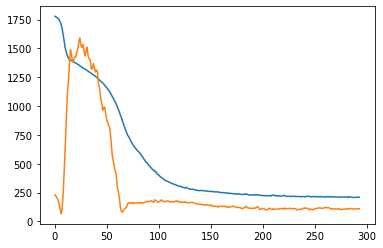

In [47]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot()
history_df

5/5 [==============================] - 0s 1ms/step


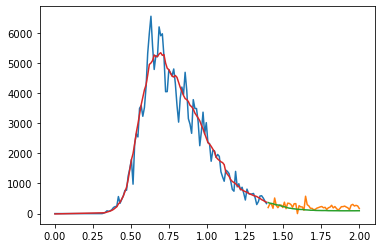

In [48]:
import matplotlib.pyplot as plt
t_train=[0]*X_train.shape[0]
for i in range(X_train.shape[0]):
    t_train[i]=X_train.numpy()[i][0]
t_test=[0]*X_test.shape[0]
for i in range(X_test.shape[0]):
    t_test[i]=X_test.numpy()[i][0]
y_test_predict=model.predict(X_test)
y_train_predict=model.predict(X_train)
plt.plot(t_train,y_train)
plt.plot(t_test,y_test)
plt.plot(t_test,y_test_predict)
plt.plot(t_train,y_train_predict)
plt.show()